## 決定木デフォルト

In [30]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.metrics import  mean_squared_error, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import graphviz

In [2]:
# pickle ファイルから読み込み
train_pkl = pd.read_pickle('./train.pk1')

In [3]:
train_pkl.shape

(850, 11)

In [5]:
train_pkl.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male,disease
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607422,0.606445,272.211334,41.978474,61.018120,7.031250,3.517578,1.144531,0.825882,0.444706
std,16.453672,2.443359,1.568359,200.348511,145.927368,110.125389,0.840820,0.560059,0.227295,0.379434,0.497226
min,10.000000,0.585938,0.034851,163.261841,3.924518,11.283497,4.859375,2.181641,0.626953,0.000000,0.000000
25%,32.000000,0.781372,0.144928,213.991409,13.644659,21.239157,6.730469,3.138672,1.004883,1.000000,0.000000
50%,48.000000,0.835693,0.194092,220.092506,16.638000,27.056026,6.914062,3.621094,1.205078,1.000000,0.000000
75%,62.000000,1.197021,0.335388,229.455933,23.056081,56.461569,7.535156,3.712891,1.288086,1.000000,1.000000
max,78.000000,23.015625,17.687500,2108.483643,1423.186523,814.439392,8.742188,5.015625,1.821289,1.000000,1.000000


In [6]:
train_pkl.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male,disease
0,59,0.787109,0.150513,220.178696,13.467617,21.729246,6.816406,3.111328,1.006836,1,0
1,69,1.003906,0.195679,221.218414,51.033463,64.752319,6.890625,3.050781,0.751465,1,1
2,65,0.657227,0.081299,320.770538,12.625011,30.613180,5.949219,2.488281,0.774902,1,0
3,65,0.906738,0.214233,369.278168,34.347599,54.510086,6.968750,3.613281,0.988281,1,1
4,22,1.735352,0.197754,222.782028,20.572891,170.010178,5.835938,3.068359,1.026367,0,0


## 訓練データとテストデータに分割

In [7]:
# 訓練とテストデータに分割
train, test = train_test_split(train_pkl, test_size=0.2, random_state=42)

In [37]:
# ターゲットと特徴量の分割
train_X = train.iloc[:, :-1].values
train_y = train.disease.values

In [38]:
train_X.shape, train_y.shape

((680, 10), (680,))

In [39]:
train_X[:5]

array([[4.4000000e+01, 2.0664062e+00, 6.3134766e-01, 2.1393562e+02,
        1.4563273e+01, 4.7154297e+01, 7.5039062e+00, 2.3027344e+00,
        7.5976562e-01, 1.0000000e+00],
       [3.6000000e+01, 8.1787109e-01, 1.9702148e-01, 2.1464464e+02,
        1.5622564e+01, 2.1059477e+01, 7.5117188e+00, 3.6308594e+00,
        1.2910156e+00, 1.0000000e+00],
       [2.0000000e+01, 7.9199219e-01, 8.2641602e-02, 3.5833951e+02,
        1.2924613e+01, 2.5772480e+01, 8.6484375e+00, 4.3242188e+00,
        1.3193359e+00, 1.0000000e+00],
       [6.5000000e+01, 6.5722656e-01, 8.1298828e-02, 3.2077054e+02,
        1.2625011e+01, 3.0613180e+01, 5.9492188e+00, 2.4882812e+00,
        7.7490234e-01, 1.0000000e+00],
       [2.9000000e+01, 1.7148438e+00, 5.1123047e-01, 2.1588597e+02,
        2.7669710e+01, 6.0709866e+01, 5.9531250e+00, 3.1171875e+00,
        1.2187500e+00, 1.0000000e+00]], dtype=float32)

## 訓練データで訓練

In [74]:
DT = tree.DecisionTreeClassifier(random_state=42)

In [75]:
DT = DT.fit(train_X, train_y)

In [76]:
train.disease.name

'disease'

In [77]:
DT.feature_importances_

array([0.01511605, 0.39309611, 0.04181567, 0.08973922, 0.08171415,
       0.16702656, 0.09457171, 0.03129288, 0.08562766, 0.        ])

In [78]:
# 特徴量の重要度が高い順に表示
print("特徴量の重要度が高い順：")
# sorted：reverse=True 降順
print(sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, 1:].columns),
    reverse=True))

特徴量の重要度が高い順：
[(0.393, 'D_Bil'), (0.167, 'TP'), (0.095, 'Alb'), (0.09, 'ALT_GPT'), (0.086, 'Gender_Male'), (0.082, 'AST_GOT'), (0.042, 'ALP'), (0.031, 'AG_ratio'), (0.015, 'T_Bil'), (0.0, 'disease')]


In [79]:
# len(train.iloc[:, 1:].columns), train.iloc[:, 1:].columns

In [80]:
# 訓練済みの決定木を視覚化
dot_data = tree.export_graphviz(DT, out_file=None,
                               feature_names=train.iloc[:, :-1].columns,
                               class_names=train.disease.name,
                               rounded=True,
                               filled=True,
                               special_characters=True)

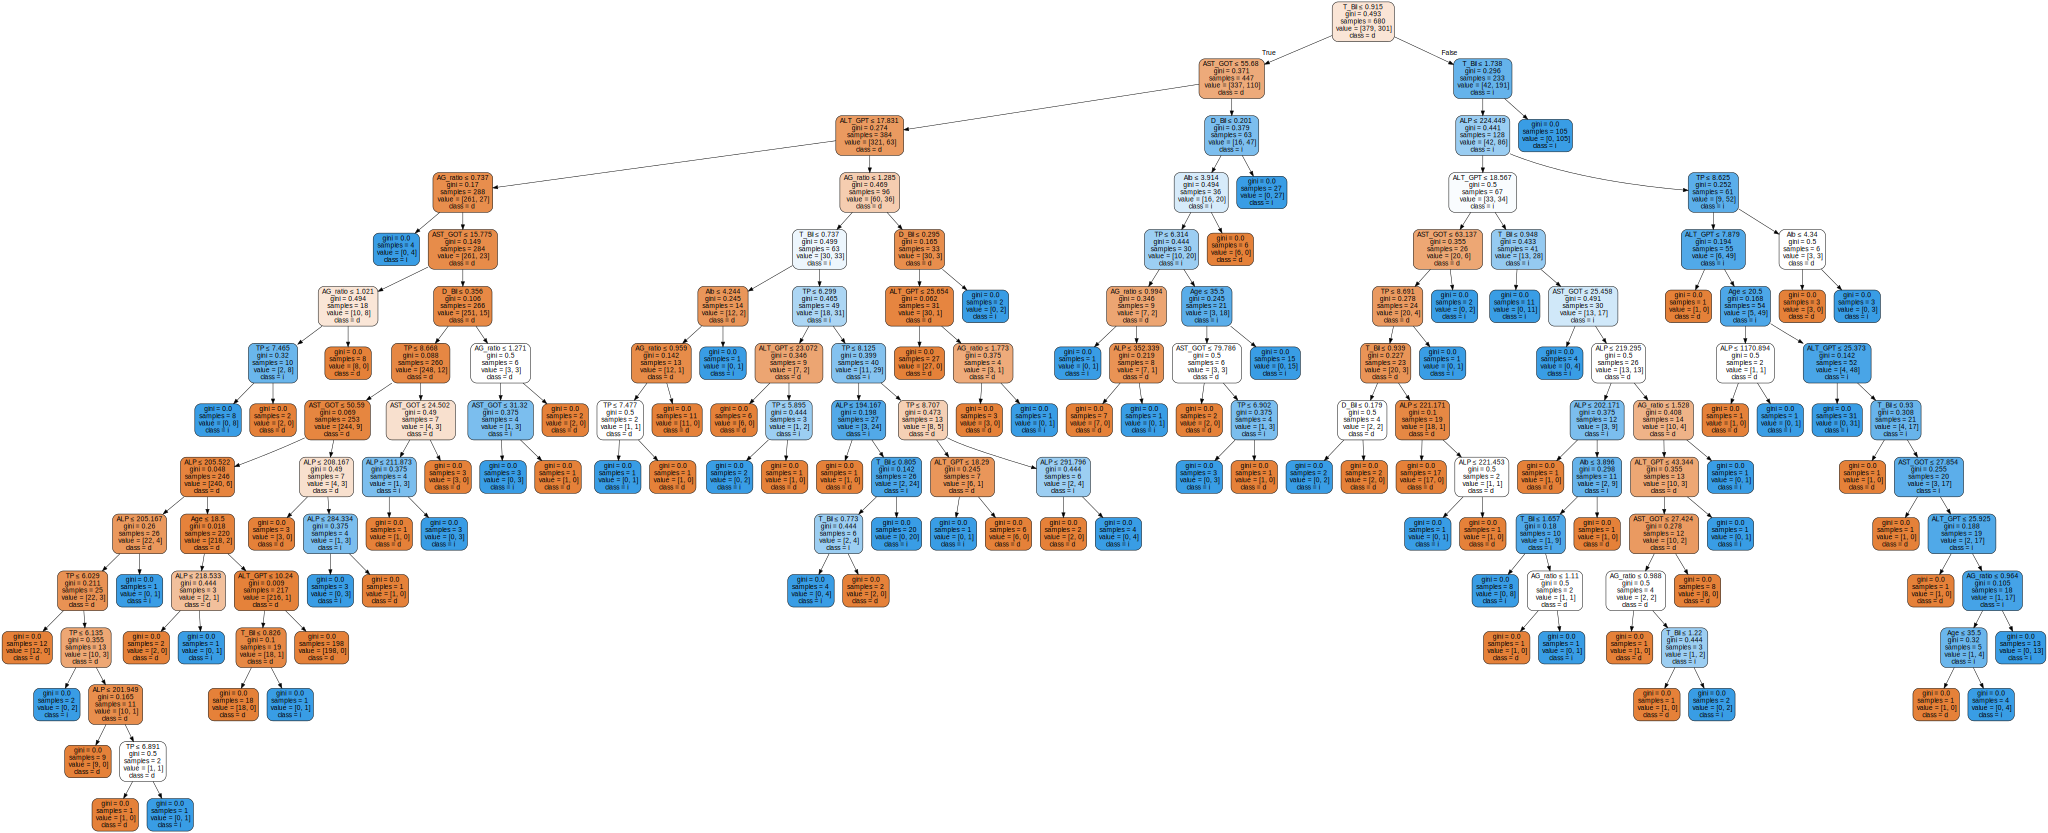

In [81]:
graph = graphviz.Source(dot_data)
graph

In [82]:
# graph.write('.\DT.png')

In [83]:
type(train_X)

numpy.ndarray

In [84]:
sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, :].columns),
    reverse=True)

[(0.393, 'T_Bil'),
 (0.167, 'AST_GOT'),
 (0.095, 'TP'),
 (0.09, 'ALP'),
 (0.086, 'AG_ratio'),
 (0.082, 'ALT_GPT'),
 (0.042, 'D_Bil'),
 (0.031, 'Alb'),
 (0.015, 'Age'),
 (0.0, 'Gender_Male')]

## テストデータで実行

In [85]:
# ターゲットと特徴量の分割
test_x = test.iloc[:, :-1].values
test_y = test.disease.values

In [86]:
test_x.shape, test_y.shape

((170, 10), (170,))

In [87]:
pred_y = DT.predict(test_x)

In [88]:
pred_y.shape

(170,)

In [89]:
confusion_matrix(test_y, pred_y)

array([[74, 19],
       [17, 60]], dtype=int64)

In [90]:
accuracy_score(test_y, pred_y)

0.788235294117647

## 検証データで実行

In [91]:
# 検証データ読み込み
valid = pd.read_pickle('./test.pk1')

In [92]:
valid.shape

(350, 10)

In [93]:
valid.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
0,25,0.801758,0.186768,214.448685,15.260516,19.496649,6.816406,3.601562,1.288086,1
1,26,0.834961,0.116455,234.136810,10.509159,16.733311,6.796875,3.111328,1.030273,0
2,64,0.791992,0.197998,216.039902,14.578304,20.695866,7.523438,3.626953,1.278320,1
3,65,0.833984,0.175781,200.901123,12.820356,20.102516,6.828125,3.626953,1.275391,1
4,34,0.690430,0.135498,208.705841,20.279018,25.096685,8.664062,4.171875,1.280273,0


In [61]:
# ID の保存
# valid_pass = valid.id.values

In [62]:
valid_X = valid.copy()

In [63]:
valid_X.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,46.702857,1.631836,0.565918,282.234070,32.363522,61.545425,7.089844,3.562500,1.154297,0.814286
std,16.166318,2.857422,1.747070,201.307434,83.888397,114.916496,0.877930,0.607422,0.248047,0.389433
min,6.000000,0.609863,0.053864,175.747528,7.862773,11.278741,4.968750,2.296875,0.668945,0.000000
25%,32.000000,0.787109,0.147705,214.211426,13.551174,20.842910,6.724609,3.127930,1.008789,1.000000
50%,48.000000,0.844971,0.193848,220.738617,16.449139,25.971273,6.931641,3.621094,1.216797,1.000000
75%,61.000000,0.973877,0.236450,231.839767,22.760056,52.746082,7.553711,3.739258,1.288086,1.000000
max,75.000000,27.046875,17.703125,2101.145752,860.919067,705.777161,8.750000,5.007812,1.804688,1.000000


In [64]:
valid_X.shape, train_X.shape

((350, 10), (680, 10))

In [65]:
pred_valid_y = DT.predict(valid_X)

In [66]:
pred_valid_y.shape

(350,)

In [68]:
type(pred_valid_y)

numpy.ndarray

In [71]:
result_df = pd.DataFrame(pred_valid_y)

In [72]:
result_df.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [73]:
result_df.to_csv("./tree_1.csv", header=False)